Талавер Олег ПІ-60[2]
Репозиторій: https://gitlab.com/bachelors2022/pi-60/talaver-oleg/other/ai.git

# ПОРІВНЯННЯ МЕТОДІВ КЛАСИФІКАЦІЇ ДАНИХ

## Класифікація за допомогою машин опорних векторів (SVM)

Створіть класифікатор у вигляді машини опорних векторів, призначений
для прогнозування меж доходу заданої фізичної особи на основі 14 ознак
(атрибутів). Метою є з'ясування умов, за яких щорічний прибуток людини
перевищує $50000 або менше цієї величини за допомогою бінарної
класифікації. Набір даних знаходяться за посиланням

Опис атрибутів, де "continuous" - числові значення, в іншому випадку - яклики

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Вхідний файл, який містить дані
input_file = 'income_data.txt'

# Читання даних
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1
        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# Перетворення на масив numpy
X = np.array(X)
print(X[:5])

# Перетворення рядкових даних на числові
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

print(X[:5])
print(y[:5])


# Створення SVМ-класифікатора
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Обчислення F-міри для SVМ-класифікатора
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100 * f1.mean(), 2)) + "%")

# Передбачення результату для тестової точки даних
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White',
              'Male', '0', '0', '40', 'United-States']

# Кодування тестової точки даних
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count += 1

input_data_encoded = np.array(input_data_encoded)

# Використання класифікатора для кодованої точки даних та виведення результату
predicted_class = classifier.predict(input_data_encoded.reshape(1, 14))
print("Label", label_encoder[-1].inverse_transform(predicted_class)[0])

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=3)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=3)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=3)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")

[['39' 'State-gov' '77516' 'Bachelors' '13' 'Never-married'
  'Adm-clerical' 'Not-in-family' 'White' 'Male' '2174' '0' '40'
  'United-States' '<=50K']
 ['50' 'Self-emp-not-inc' '83311' 'Bachelors' '13' 'Married-civ-spouse'
  'Exec-managerial' 'Husband' 'White' 'Male' '0' '0' '13' 'United-States'
  '<=50K']
 ['38' 'Private' '215646' 'HS-grad' '9' 'Divorced' 'Handlers-cleaners'
  'Not-in-family' 'White' 'Male' '0' '0' '40' 'United-States' '<=50K']
 ['53' 'Private' '234721' '11th' '7' 'Married-civ-spouse'
  'Handlers-cleaners' 'Husband' 'Black' 'Male' '0' '0' '40'
  'United-States' '<=50K']
 ['28' 'Private' '338409' 'Bachelors' '13' 'Married-civ-spouse'
  'Prof-specialty' 'Wife' 'Black' 'Female' '0' '0' '40' 'Cuba' '<=50K']]
[[    39      5  77516      9     13      4      0      1      4      1
    2174      0     40     38]
 [    50      4  83311      9     13      2      3      0      4      1
       0      0     13     38]
 [    38      2 215646     11      9      0      5      1     

C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score: 56.15%
Label <=50K


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 62.64%


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precision: 75.88%


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Recall: 62.64%


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Випадкова тестова точка була віднесена до класу <=50

##  Порівняння якості класифікаторів SVM з нелінійними ядрами
Використовуючи набір даних та код з попереднього завдання створіть та дослідіть нелінійні класифікатори SVM.
- з поліноміальним ядром;
- з гаусовим ядром;
- з сигмоїдальним ядром.

Для кожного виду класифікатора отримайте та запишіть у звіт показники якості алгоритму класифікації.

In [2]:
# Створення SVМ-класифікатора
classifier = svm.SVC(kernel='poly', degree=8, max_iter=10_000, random_state=0)
classifier.fit(X_train, y_train)

# Використання класифікатора для кодованої точки даних та виведення результату
predicted_class = classifier.predict(input_data_encoded.reshape(1, 14))
print("Label", label_encoder[-1].inverse_transform(predicted_class)[0])

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=3)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=3)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=3)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")

C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Label >50K


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 75.12%


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Precision: 70.07%


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Recall: 75.12%


In [3]:
# Створення SVМ-класифікатора
classifier = svm.SVC(kernel='rbf', max_iter=10_000, random_state=0)
classifier.fit(X_train, y_train)

# Використання класифікатора для кодованої точки даних та виведення результату
predicted_class = classifier.predict(input_data_encoded.reshape(1, 14))
print("Label", label_encoder[-1].inverse_transform(predicted_class)[0])

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=3)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=3)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=3)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")

Label <=50K
Accuracy: 78.61%
Precision: 83.06%
Recall: 78.61%


In [5]:
# Створення SVМ-класифікатора
classifier = svm.SVC(kernel='sigmoid', max_iter=10_000, random_state=0)
classifier.fit(X_train, y_train)

# Використання класифікатора для кодованої точки даних та виведення результату
predicted_class = classifier.predict(input_data_encoded.reshape(1, 14))
print("Label", label_encoder[-1].inverse_transform(predicted_class)[0])

accuracy_values = cross_val_score(classifier, X, y, scoring='accuracy', cv=3)
print("Accuracy: " + str(round(100 * accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier, X, y, scoring='precision_weighted', cv=3)
print("Precision: " + str(round(100 * precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=3)
print("Recall: " + str(round(100 * recall_values.mean(), 2)) + "%")

Label <=50K
Accuracy: 63.89%
Precision: 63.65%
Recall: 63.89%


## Порівняння якості класифікаторів на прикладі класифікації сортів ірисів

Необхідно класифікувати сорти ірисів за деякими їх характеристиками: довжина та ширина пелюсток, а також довжина та ширина чашолистків

In [6]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print("Ключі iris_dataset: \n{}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
print("Назви відповідей: {}".format(iris_dataset['target_names']))
print("Назва ознак: \n{}".format(iris_dataset['feature_names']))
print("Тип масиву data: {}".format(type(iris_dataset['data'])))
print("Форма масиву data: {}".format(iris_dataset['data'].shape))

# - Виведіть значення ознак для перших п'яти прикладів
print("Дані: \n{}".format(iris_dataset['data'][0:5]))

print("Тип target: {}".format(type(iris_dataset['target'])))
print("Сорти квіток зі структури data:\n{}".format(iris_dataset['target']))

Ключі iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Назви відповідей: ['setosa' 'versicolor' 'virginica']
Назва ознак: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Тип масиву data: <class 'numpy.ndarray'>
Форма масиву data: (150, 4)
Дані: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Тип target: <class 'numpy.ndarray'>
Сорти квіток зі структури data:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

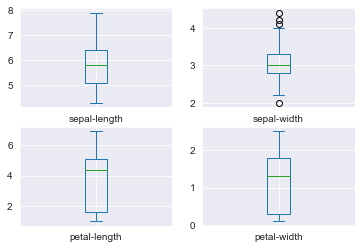

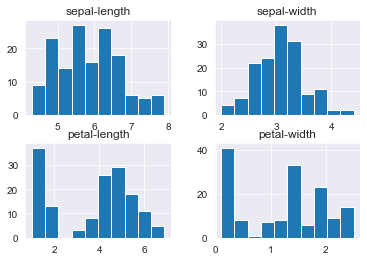

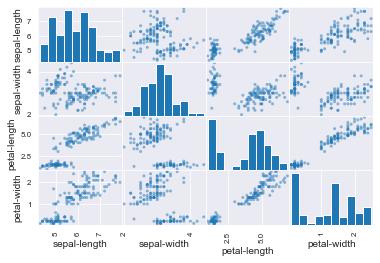

In [7]:
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Завантаження датасету
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# shape
print(dataset.shape)

# Зріз даних head
print(dataset.head(20))

# Стастичні зведення методом describe
print(dataset.describe())

# Розподіл за атрибутом class
print(dataset.groupby('class').size())

# Діаграма розмаху
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
pyplot.show()

# Гістограма розподілу атрибутів датасета
dataset.hist()
pyplot.show()

# Матриця діаграм розсіювання
scatter_matrix(dataset)
pyplot.show()

# Розділення датасету на навчальну та контрольну вибірки
array = dataset.values

# Вибір перших 4-х стовпців
X = array[:, 0:4]

# Вибір 5-го стовпця
y = array[:, 4]

# Разделение X и y на обучающую и контрольную выборки
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Завантажуємо алгоритми моделі
models = []
models.append(('LR', LogisticRegression(solver='liblinear',
                                        multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


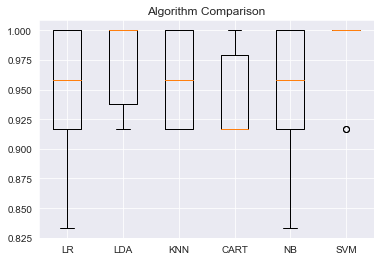

In [8]:
# оцінюємо модель на кожній ітерації
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Порівняння алгоритмів
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Якщо оцінювати за accuracy, то модель на базі SVM має найточніші результаи, адже в більшості випадків акуратність сягає 100% і лише в одному з випадків вона дорівнювала приблизно 91%

In [9]:
# Створюємо прогноз на контрольній вибірці
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Оцінюємо прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [10]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма вхідних даних: {}".format(X_new.shape))
prediction = model.predict(X_new)
print("Результат: {}".format(prediction))

Форма вхідних даних: (1, 4)
Результат: ['Iris-setosa']


З резільтатів видно, що наша модель розпізнала квітку з прикладу як `Iris-setosa`, при цьому показник `accuracy` моделі досягав 97% на тестових даних

# Порівняння якості класифікаторів для набору даних завдання 2.1

LR: 0.793402 (0.006253)
LDA: 0.812176 (0.003802)
KNN: 0.766961 (0.006871)
CART: 0.804302 (0.006365)
NB: 0.789796 (0.004791)


C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\University\AI\venv\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

SVM: 0.560107 (0.191033)


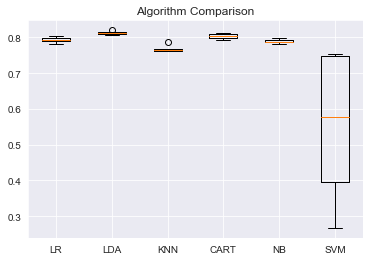

In [11]:
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Вхідний файл, який містить дані
input_file = 'income_data.txt'

# Читання даних
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1
        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# Перетворення на масив numpy
X = np.array(X)

# Перетворення рядкових даних на числові
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Разделение X и y на обучающую и контрольную выборки
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Завантажуємо алгоритми моделі
models = []
models.append(('LR', LogisticRegression(solver='liblinear',
                                        multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto', max_iter=1_000)))

# оцінюємо модель на кожній ітерації
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', )
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Порівняння алгоритмів
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [12]:
# - SVC
model = SVC(gamma='auto', max_iter=1_000)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('SVC')
print(classification_report(Y_validation, predictions))

SVC
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4483
           1       0.57      0.00      0.01      1550

    accuracy                           0.74      6033
   macro avg       0.66      0.50      0.43      6033
weighted avg       0.70      0.74      0.63      6033



In [13]:
# - Gaussian
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('Gaussian')
print(classification_report(Y_validation, predictions))

Gaussian
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4483
           1       0.69      0.31      0.43      1550

    accuracy                           0.79      6033
   macro avg       0.74      0.63      0.65      6033
weighted avg       0.77      0.79      0.76      6033



In [14]:
# - DecisionTree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('DecisionTree')
print(classification_report(Y_validation, predictions))

DecisionTree
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4483
           1       0.62      0.62      0.62      1550

    accuracy                           0.81      6033
   macro avg       0.75      0.74      0.74      6033
weighted avg       0.81      0.81      0.81      6033



In [15]:
# - KNeighbors
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('KNeighbors')
print(classification_report(Y_validation, predictions))

KNeighbors
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4483
           1       0.59      0.31      0.41      1550

    accuracy                           0.77      6033
   macro avg       0.69      0.62      0.63      6033
weighted avg       0.74      0.77      0.74      6033



In [16]:
# - LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('LinearDiscriminantAnalysis')
print(classification_report(Y_validation, predictions))

LinearDiscriminantAnalysis
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4483
           1       0.71      0.42      0.52      1550

    accuracy                           0.81      6033
   macro avg       0.76      0.68      0.70      6033
weighted avg       0.79      0.81      0.79      6033



In [17]:
# - LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('LogisticRegression')
print(classification_report(Y_validation, predictions))

LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4483
           1       0.65      0.28      0.40      1550

    accuracy                           0.78      6033
   macro avg       0.72      0.62      0.63      6033
weighted avg       0.76      0.78      0.74      6033



За графіком, краще усього себе проявив LinearDiscriminantAnalysis. Причина в тому що в SVC було встановлено значення max_iter, бо в іншому випадку обрахунки займали надто багато часу.

# Класифікація даних лінійним класифікатором Ridge

Accuracy: 0.7556
Precision: 0.8333
Recall: 0.7556
F1 Score: 0.7503
Cohen Kappa Score: 0.6431
Matthews Corrcoef: 0.6831
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.44      0.89      0.59         9
           2       0.91      0.50      0.65        20

    accuracy                           0.76        45
   macro avg       0.78      0.80      0.75        45
weighted avg       0.85      0.76      0.76        45



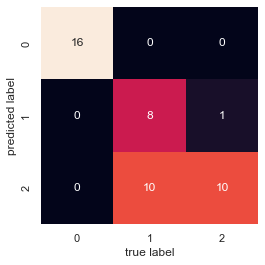

In [18]:
# ===================================================
# Приклад класифікатора Ridge
# ======================================================================
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from io import BytesIO

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RidgeClassifier(tol=1e-2, solver="sag")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'), 4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred, average='weighted'), 4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'), 4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred), 4))
print('\t\tClassification Report:\n', metrics.classification_report(y_pred, y_test))

sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("Confusion.jpg")
# Save SVG in a fake file object.
f = BytesIO()
plt.savefig(f, format="svg")

### Опишіть які налаштування класифікатора Ridge тут використані та що во-ни позначають.

- tol float, default=1e-3 - Precision of the solution.
- solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’ -Solver to use in the computational routines:
    - ‘auto’ chooses the solver automatically based on the type of data.
    - ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.
    - ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
    - ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).
    - ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.
    - ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its unbiased and more flexible version named SAGA. Both methods use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.
    - New in version 0.17: Stochastic Average Gradient descent solver.
    - New in version 0.19: SAGA solver.
    - ‘lbfgs’ uses L-BFGS-B algorithm implemented in scipy.optimize.minimize. It can be used only when positive is True.


### Опишіть які показники якості використовуються та їх отримані результа-ти.

Використовуються наступні показники якості з отриманими значеннями
- Accuracy: 0.7556
- Precision: 0.8333
- Recall: 0.7556
- F1 Score: 0.7503
- Cohen Kappa Score: 0.6431
- Matthews Corrcoef: 0.6831

### Вставте у звіт та поясніть зображення Confusion.jpg

![](Confusion.jpg)

Зображення є так званною тепловою мапою, яка поділена на рядки (отримані результати) та стовпці (справжні результати). Цифрами та кольором квадратів позначається кількість отриманих результатів

### Опишіть, що таке коефіцієнт Коена Каппа та коефіцієнт кореляції Метьюза. Що вони тут розраховують та що показують.

Коефіцієнт Коена Каппа – статистика, яка показує коефіцієнт зменшення помилок між класифікацією та випадковою класифікацією. Наприклад, 0,6431 > 0,5, що означає більш менш задовільну згоду між коефіцієнтами.

Коефіцієнт кореляції Метьюза – міра якості моно-та мультикласових класи-фікацій. Значення 0,6831 означає, що класифікатор близький до правильного результату.
